The choice of which visualization method to use depends on what aspect of the audio you want to analyze:

    Waveform: Good for temporal dynamics like volume and duration.
    Spectrogram: Best for analyzing the frequency content over time.
    Chroma: Ideal for music where you want to analyze the tonal content.
    Scalogram: Useful for detailed frequency analysis over time, especially where non-stationary signals are involved.

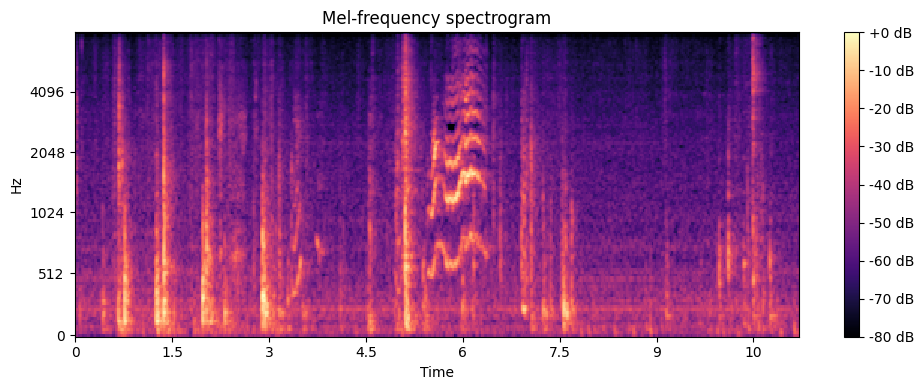

In [3]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

#Spectrogram (Short-Time Fourier Transform)
def display_spectrogram(audio_path):
    # Load audio file
    y, sr = librosa.load(audio_path)
    # Create a Mel-scaled power (energy-squared) spectrogram
    S = librosa.feature.melspectrogram(y=y, sr=sr, n_mels=128, fmax=8000)
    # Convert to log scale (dB)
    S_dB = librosa.power_to_db(S, ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(S_dB, sr=sr, x_axis='time', y_axis='mel', fmax=8000)
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel-frequency spectrogram')
    plt.tight_layout()
    plt.show()

# Path to a WAV file
audio_path = '/content/drive/MyDrive/datasetCD_audio_cat_dog/DS_audio_cat_dog/cat/cat_1.wav'

# Call the function to display the spectrogram
display_spectrogram(audio_path)


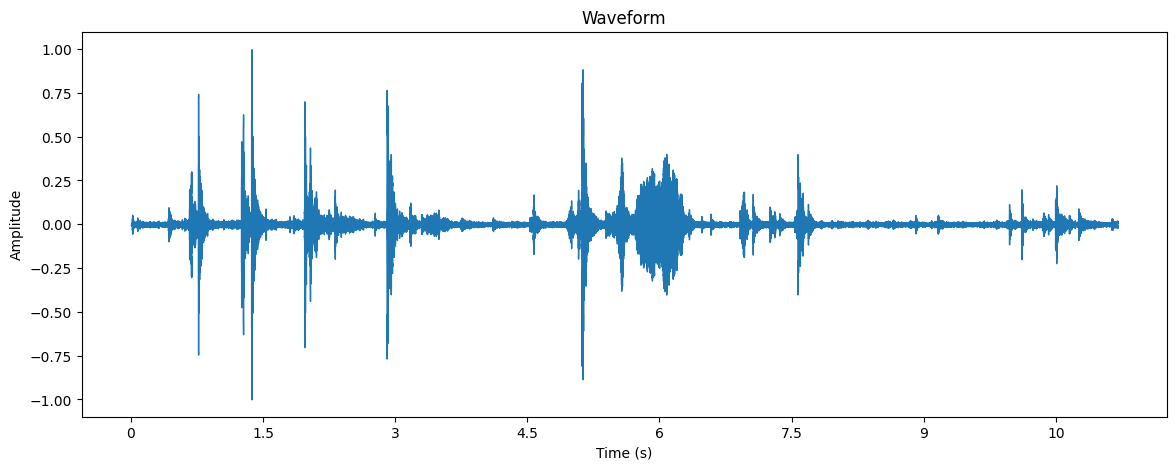

In [8]:
import matplotlib.pyplot as plt
import librosa
import librosa.display

#Waveform Visualization
#This method plots the raw audio signal's amplitude over time

def plot_waveform(audio_path):
    y, sr = librosa.load(audio_path, sr=None)  # Load audio file
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(y, sr=sr)
    plt.title('Waveform')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')
    plt.show()

# Path to a WAV file
audio_path = '/content/drive/MyDrive/datasetCD_audio_cat_dog/DS_audio_cat_dog/cat/cat_1.wav'
plot_waveform(audio_path)


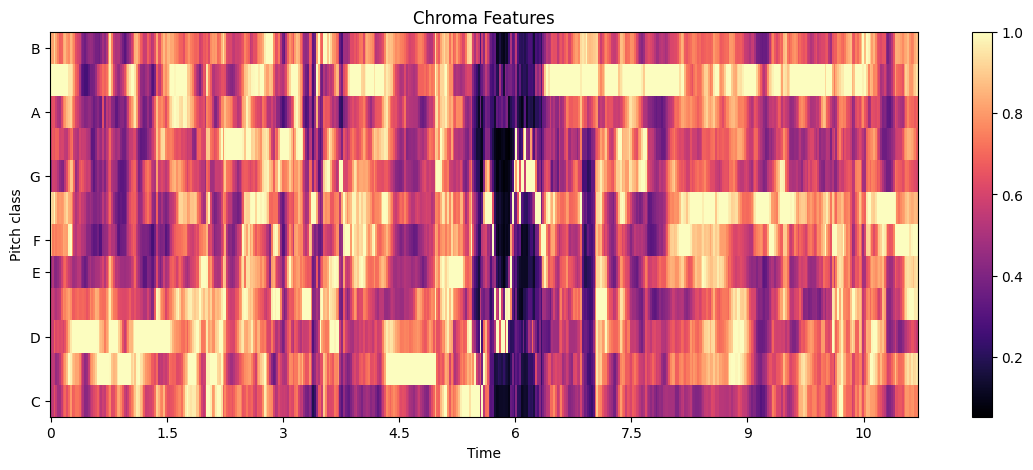

In [9]:
#Chroma Feature
def plot_chroma(audio_path):
    y, sr = librosa.load(audio_path)
    chroma = librosa.feature.chroma_cqt(y=y, sr=sr)

    plt.figure(figsize=(14, 5))
    librosa.display.specshow(chroma, y_axis='chroma', x_axis='time')
    plt.colorbar()
    plt.title('Chroma Features')
    plt.show()

# Path to a WAV file
audio_path = '/content/drive/MyDrive/datasetCD_audio_cat_dog/DS_audio_cat_dog/cat/cat_1.wav'
plot_chroma(audio_path)


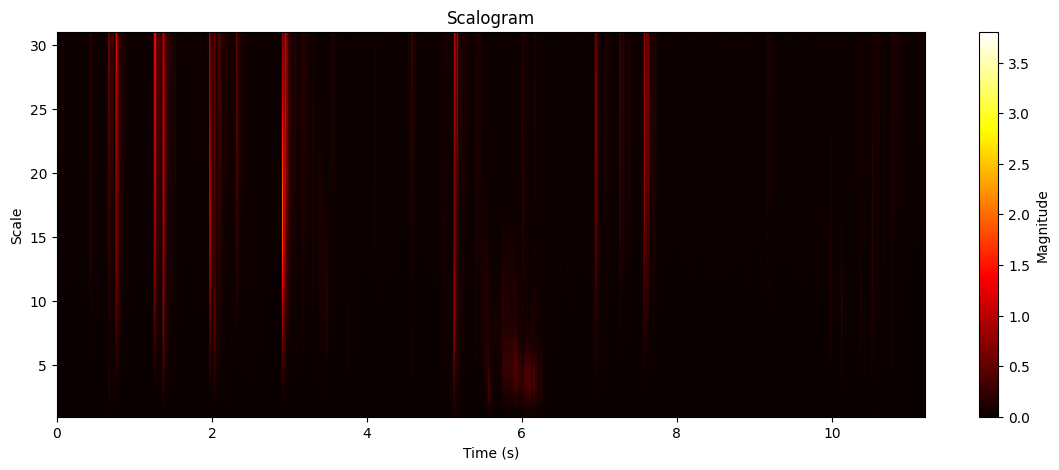

In [11]:
import pywt
#Scalogram (Continuous Wavelet Transform)

def plot_scalogram(audio_path):
    y, sr = librosa.load(audio_path)
    coefficients, frequencies = pywt.cwt(y, scales=np.arange(1, 31), wavelet='mexh')

    plt.figure(figsize=(14, 5))
    plt.imshow(np.abs(coefficients), extent=[0, len(y)/sr, 1, 31], aspect='auto', cmap='hot', origin='lower')
    plt.colorbar(label='Magnitude')
    plt.title('Scalogram')
    plt.ylabel('Scale')
    plt.xlabel('Time (s)')
    plt.show()

# Path to a WAV file
audio_path = '/content/drive/MyDrive/datasetCD_audio_cat_dog/DS_audio_cat_dog/cat/cat_1.wav'
plot_scalogram(audio_path)


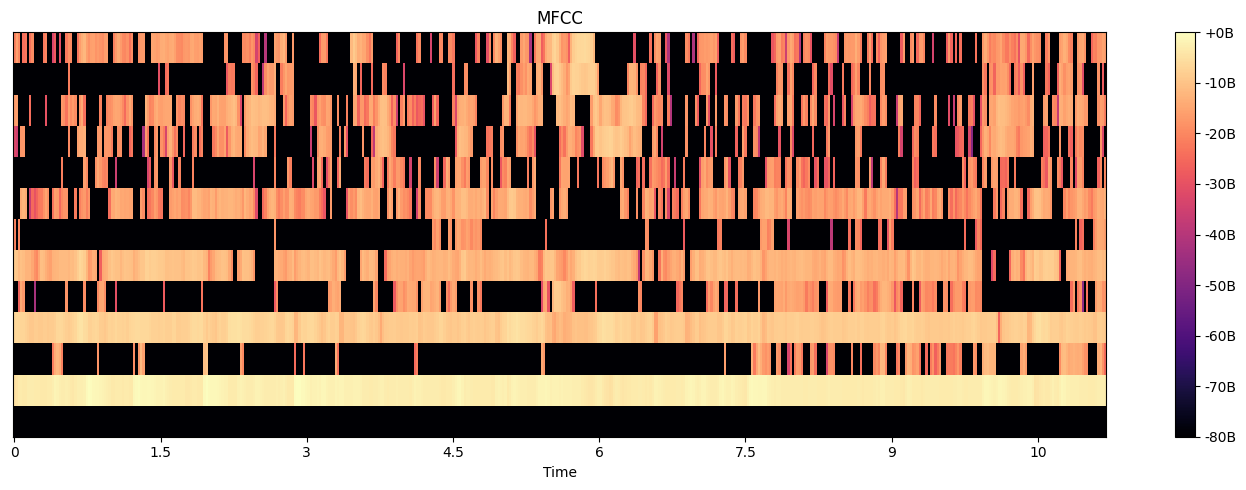

In [12]:

#MFCC (Mel-Frequency Cepstral Coefficients)

#MFCCs are perhaps the most commonly used feature in audio signal processing, especially in speech and music analysis. #

import librosa
import librosa.display
import matplotlib.pyplot as plt

def plot_mfcc(audio_path):
    y, sr = librosa.load(audio_path)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
    mfccs = librosa.power_to_db(mfccs, ref=np.max)

    plt.figure(figsize=(14, 5))
    librosa.display.specshow(mfccs, x_axis='time')
    plt.colorbar(format='%+2dB')
    plt.title('MFCC')
    plt.tight_layout()
    plt.show()

# Path to a WAV file
audio_path = '/content/drive/MyDrive/datasetCD_audio_cat_dog/DS_audio_cat_dog/cat/cat_1.wav'
plot_mfcc(audio_path)


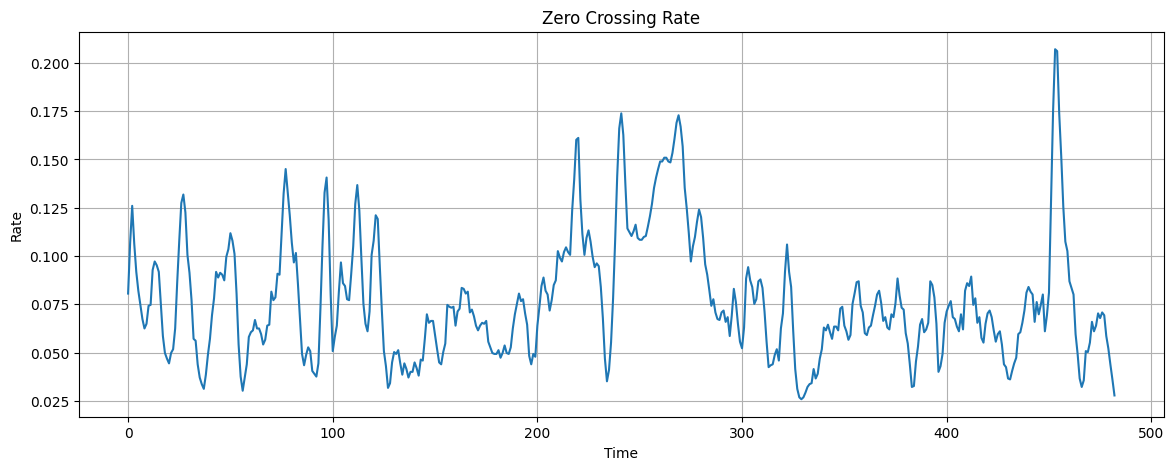

In [14]:
#Zero-Crossing Rate

#This feature measures the rate at which the signal changes from positive to negative or back.

def plot_zero_crossing_rate(audio_path):
    y, sr = librosa.load(audio_path)
    zcr = librosa.feature.zero_crossing_rate(y)

    plt.figure(figsize=(14, 5))
    plt.plot(zcr[0])
    plt.title('Zero Crossing Rate')
    plt.xlabel('Time')
    plt.ylabel('Rate')
    plt.grid()
    plt.show()

# Path to a WAV file
audio_path = '/content/drive/MyDrive/datasetCD_audio_cat_dog/DS_audio_cat_dog/cat/cat_1.wav'
plot_zero_crossing_rate(audio_path)


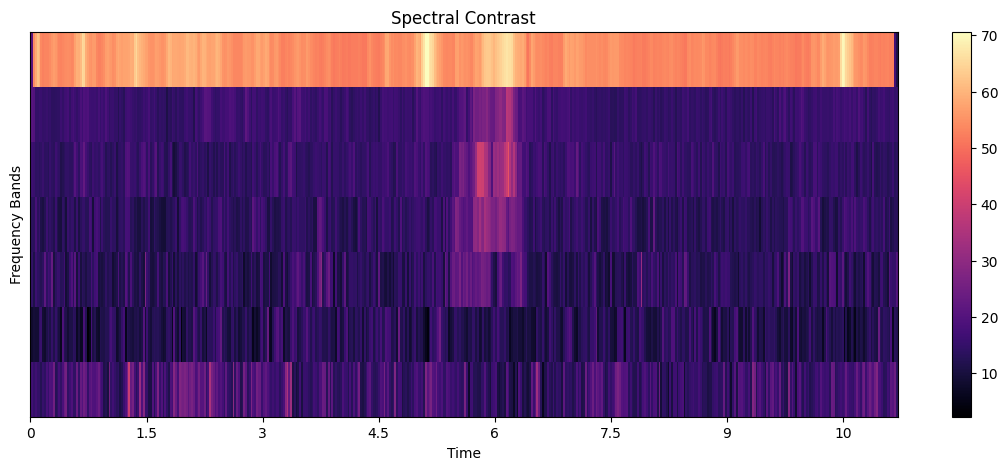

In [15]:
def plot_spectral_contrast(audio_path):
    y, sr = librosa.load(audio_path)
    S = np.abs(librosa.stft(y))
    contrast = librosa.feature.spectral_contrast(S=S, sr=sr)

    plt.figure(figsize=(14, 5))
    librosa.display.specshow(contrast, x_axis='time')
    plt.colorbar()
    plt.ylabel('Frequency Bands')
    plt.title('Spectral Contrast')
    plt.show()

# Path to a WAV file
audio_path = '/content/drive/MyDrive/datasetCD_audio_cat_dog/DS_audio_cat_dog/cat/cat_1.wav'
plot_spectral_contrast(audio_path)


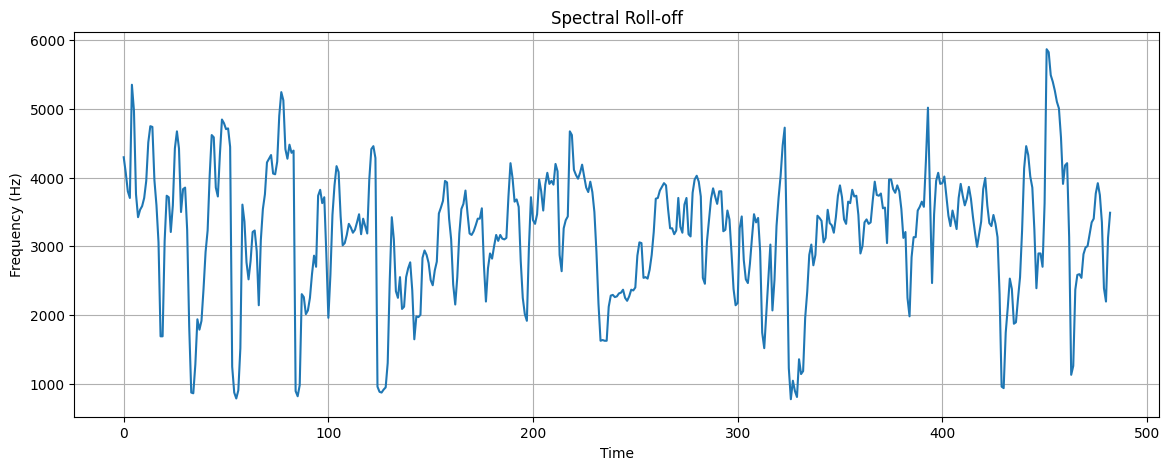

In [16]:
def plot_spectral_rolloff(audio_path):
    y, sr = librosa.load(audio_path)
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)

    plt.figure(figsize=(14, 5))
    plt.plot(rolloff[0])
    plt.title('Spectral Roll-off')
    plt.xlabel('Time')
    plt.ylabel('Frequency (Hz)')
    plt.grid()
    plt.show()

# Path to a WAV file
audio_path = '/content/drive/MyDrive/datasetCD_audio_cat_dog/DS_audio_cat_dog/cat/cat_1.wav'
plot_spectral_rolloff(audio_path)
